In [ ]:
pip install scikit-learn

In [ ]:
pip install xgboost

https://github.com/dmlc/xgboost/tree/master/demo/guide-python

In [ ]:
import numpy as np
import xgboost as xgb
import sklearn
import pandas as pd
import matplotlib.pyplot as plt  

import time, pickle, os, random

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from numpy import loadtxt
from pandas.core.arrays.datetimes import tz_to_dtype
from xgboost import XGBClassifier
from sklearn import preprocessing

from collections import defaultdict
from operator import itemgetter

# connect to google drive
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
def xgboost_product(n_train):
  '''Fit XGBoost on a subset of the product dataset. 
  Arguments: 
    1. n_train (int) -> size of the training subset.
  Returns: 
    1. train_time (float) -> time to fit XGBoost. 
    2. accuracy (float) -> test accuracy on remaining data. 
    3. error_rate (float) -> complement of accuracy.'''
  # load data 
  dpath = '/content/gdrive/MyDrive' 

  data = np.loadtxt(dpath+'/otto-group-product-classification-challenge/train.csv', delimiter=',', skiprows=1, usecols=np.arange(94))

  label_str = pd.read_csv(dpath+'/otto-group-product-classification-challenge/train.csv', usecols=['target'])['target'].to_list()
  data=np.c_[data, label_str]
  n_test=data.shape[0]-n_train
  #Random sample 5000 values for testing
  random.seed(42)
  ind=random.sample(range(61878), n_test)

  x_test=data[ind,:]
  x_train=np.delete(data,ind,0)

  y_test=x_test[:,-1]
  y_train=x_train[:,-1]
  x_train=np.delete(x_train,0,1)
  x_test=np.delete(x_test,0,1)
  x_train=np.delete(x_train,-1,1)
  x_test=np.delete(x_test,-1,1)
  y_train=[w.replace('Class_', '') for w in y_train]
  y_train=[int(x) for x in y_train]
  y_test=[w.replace('Class_', '') for w in y_test]
  y_test=[int(x) for x in y_test]

  # fit model no training data
  model = XGBClassifier(max_depth=6,n_estimators=10, verbose=2)
  eval_set = [(x_train, y_train), (x_test, y_test)]

  start = time.time() 
  model.fit(x_train, y_train)#, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)
  train_time = time.time() - start 

  # make predictions for test data
  y_pred = model.predict(x_test)
  pred = [round(value) for value in y_pred]

  # evaluate predictions
  accuracy = accuracy_score(y_test, pred)
  error_rate=1-accuracy

  return train_time, accuracy, error_rate

In [ ]:
# varying train set sizes
ns = [10000, 20000, 40000, 60000] 

train_times = [] 
accuracies = [] 
error_rates = [] 

# metrics for XGBoost
for n in ns: 
  train_time, accuracy, error_rate = xgboost_product(n)
  train_times.append(train_time) 
  accuracies.append(accuracy) 
  error_rates.append(error_rate) 

print(train_times) 
print(accuracies) 
print(error_rates)

tt_xgb = train_times 
acc_xgb = accuracies 
er_xgb = error_rates 

[3.830737352371216, 7.669978618621826, 15.55947756767273, 23.458369970321655]
[0.7419522726396546, 0.7529968002292373, 0.7548679038303319, 0.7641107561235356]
[0.2580477273603454, 0.24700319977076268, 0.24513209616966813, 0.23588924387646437]


In [ ]:
def adaboost_product(n_train):
  '''Fit Adaboost on a subset of the product dataset. 
  Arguments: 
    1. n_train (int) -> size of the training subset.
  Returns: 
    1. train_time (float) -> time to fit Adaboost. 
    2. accuracy (float) -> test accuracy on remaining data. 
    3. error_rate (float) -> complement of accuracy.'''

  # load data 
  dpath = '/content/gdrive/MyDrive' 

  data = np.loadtxt(dpath+'/otto-group-product-classification-challenge/train.csv', delimiter=',', skiprows=1, usecols=np.arange(94))

  label_str = pd.read_csv(dpath+'/otto-group-product-classification-challenge/train.csv', usecols=['target'])['target'].to_list()
  data=np.c_[data, label_str]
  n_test=data.shape[0]-n_train
  #Random sample 5000 values for testing
  random.seed(42)
  ind=random.sample(range(61878), n_test)

  x_test=data[ind,:]
  x_train=np.delete(data,ind,0)

  y_test=x_test[:,-1]
  y_train=x_train[:,-1]
  x_train=np.delete(x_train,0,1)
  x_test=np.delete(x_test,0,1)
  x_train=np.delete(x_train,-1,1)
  x_test=np.delete(x_test,-1,1)
  y_train=[w.replace('Class_', '') for w in y_train]
  y_train=[int(x) for x in y_train]
  y_test=[w.replace('Class_', '') for w in y_test]
  y_test=[int(x) for x in y_test]

  # fit model no training data
  tmp = time.time()
  dtree=DecisionTreeClassifier()
  model=AdaBoostClassifier(n_estimators=10,base_estimator=dtree)

  start = time.time() 
  model.fit(x_train, y_train)#, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)
  train_time = time.time() - start 

  # make predictions for test data
  y_pred = model.predict(x_test)
  pred = [round(value) for value in y_pred]

  # evaluate predictions
  accuracy = accuracy_score(y_test, pred)
  error_rate=1-accuracy

  return train_time, accuracy, error_rate

In [ ]:
# varying train set sizes 
ns = [10000, 20000, 40000, 60000] 

train_times = [] 
accuracies = [] 
error_rates = [] 

# metrics for Adaboost 
for n in ns: 
  train_time, accuracy, error_rate = adaboost_product(n)
  train_times.append(train_time) 
  accuracies.append(accuracy) 
  error_rates.append(error_rate) 

print(train_times) 
print(accuracies) 
print(error_rates)

tt_ada = train_times 
acc_ada = accuracies 
er_ada = error_rates 

[0.9915735721588135, 2.072284460067749, 4.375605583190918, 6.529709577560425]
[0.6584486680288368, 0.6847748221022971, 0.7082000182832069, 0.7097976570820022]
[0.34155133197116316, 0.3152251778977029, 0.2917999817167931, 0.29020234291799785]


In [ ]:
def gradboost_product(n_train):
  '''Fit Gradient Tree Boosting on a subset of the product dataset. 
  Arguments: 
    1. n_train (int) -> size of the training subset.
  Returns: 
    1. train_time (float) -> time to fit gradient tree boosting. 
    2. accuracy (float) -> test accuracy on remaining data. 
    3. error_rate (float) -> complement of accuracy.'''
  # load data 
  dpath = '/content/gdrive/MyDrive' 

  data = np.loadtxt(dpath+'/otto-group-product-classification-challenge/train.csv', delimiter=',', skiprows=1, usecols=np.arange(94))

  label_str = pd.read_csv(dpath+'/otto-group-product-classification-challenge/train.csv', usecols=['target'])['target'].to_list()
  data=np.c_[data, label_str]
  n_test=data.shape[0]-n_train
  #Random sample 5000 values for testing
  random.seed(42)
  ind=random.sample(range(61878), n_test)

  x_test=data[ind,:]
  x_train=np.delete(data,ind,0)

  y_test=x_test[:,-1]
  y_train=x_train[:,-1]
  x_train=np.delete(x_train,0,1)
  x_test=np.delete(x_test,0,1)
  x_train=np.delete(x_train,-1,1)
  x_test=np.delete(x_test,-1,1)
  y_train=[w.replace('Class_', '') for w in y_train]
  y_train=[int(x) for x in y_train]
  y_test=[w.replace('Class_', '') for w in y_test]
  y_test=[int(x) for x in y_test]

  # fit model no training data
  tmp = time.time()
  model = GradientBoostingClassifier(n_estimators=10, max_depth=6, verbose=0) 

  start = time.time() 
  model.fit(x_train, y_train)#, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)
  train_time = time.time() - start 

  # make predictions for test data
  y_pred = model.predict(x_test)
  pred = [round(value) for value in y_pred]

  # evaluate predictions
  accuracy = accuracy_score(y_test, pred)
  error_rate=1-accuracy

  return train_time, accuracy, error_rate

[7.297321319580078, 14.768163442611694, 36.93318796157837, 54.943281173706055]
[0.7347237750106018, 0.7443048856201346, 0.7500685620257793, 0.7582534611288605]
[0.2652762249893982, 0.25569511437986536, 0.24993143797422068, 0.2417465388711395]


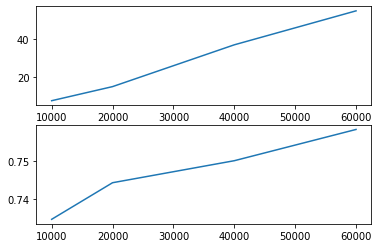

In [ ]:
# varying train set sizes 
ns = [10000, 20000, 40000, 60000] 

train_times = [] 
accuracies = [] 
error_rates = [] 

# metrics for gradient tree boosting 
for n in ns: 
  train_time, accuracy, error_rate = gradboost_product(n)
  train_times.append(train_time) 
  accuracies.append(accuracy) 
  error_rates.append(error_rate) 

print(train_times) 
print(accuracies) 
print(error_rates)

tt_gb = train_times 
acc_gb = accuracies 
er_gb = error_rates 

fig, axes = plt.subplots(2) 

axes[0].plot(ns, train_times) 
axes[1].plot(ns, accuracies)

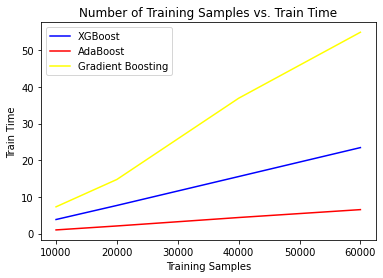

In [ ]:
# train set size vs. train time 
plt.plot(ns, tt_xgb, color='blue', label='XGBoost') 
plt.plot(ns, tt_ada, color='red', label='AdaBoost') 
plt.plot(ns, tt_gb, color='yellow', label='Gradient Boosting')
plt.legend() 
plt.title('Number of Training Samples vs. Train Time') 
plt.xlabel('Training Samples') 
plt.ylabel('Train Time') 
plt.show() 

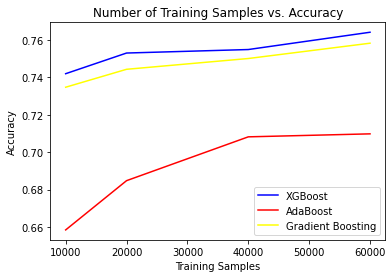

In [ ]:
# train set size vs. accuracy 
plt.plot(ns, acc_xgb, color='blue', label='XGBoost') 
plt.plot(ns, acc_ada, color='red', label='AdaBoost') 
plt.plot(ns, acc_gb, color='yellow', label='Gradient Boosting')
plt.legend() 
plt.title('Number of Training Samples vs. Accuracy') 
plt.xlabel('Training Samples') 
plt.ylabel('Accuracy') 
plt.show() 

In [ ]:
# load data
dpath = '/content/gdrive/MyDrive' 

df = pd.read_csv(dpath+'/train_as.csv')
# select text columns
cat_cols = df.select_dtypes(include='object').columns

# this is a way to apply label_encoder to all category cols at once, returning a label encoder per categorical column, in a dict d 
d = defaultdict(preprocessing.LabelEncoder)

 # transform all text columns to numbers
df[cat_cols] = df[cat_cols].apply(lambda x: d[x.name].fit_transform(x.astype(str)))


In [ ]:
data=df.to_numpy()
data.shape

(188318, 132)

In [ ]:
def xgboost_allstate(n_train,data):
  '''Fit XGBoost on a subset of the allstate dataset. 
  Arguments: 
    1. n_train (int) -> size of the training subset.
  Returns: 
    1. train_time (float) -> time to fit gradient tree boosting. 
    2. mse (float) -> test mse on remaining data.'''

  n_test=data.shape[0]-n_train
  # load data 
  #Random sample 5000 values for testing
  s=data.shape[0]
  random.seed(42)
  ind=random.sample(range(s), n_test)

  x_test=data[ind,:]
  x_train=np.delete(data,ind,0)

  y_test=x_test[:,-1]
  y_train=x_train[:,-1]
  x_train=np.delete(x_train,0,1)
  x_test=np.delete(x_test,0,1)
  x_train=np.delete(x_train,-1,1)
  x_test=np.delete(x_test,-1,1)

  # fit model no training data
  model = xgb.XGBRegressor(n_estimators=10,max_depth=6, verbose=2,tree_method='auto',effect_learner_objective='reg:squarederror')
  eval_set = [(x_train, y_train), (x_test, y_test)]

  start = time.time() 
  model.fit(x_train, y_train)#, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)
  train_time = time.time() - start 

  # make predictions for test data
  y_pred = model.predict(x_test)
  #pred = [round(value) for value in y_pred]

  mse=mean_squared_error(y_pred,y_test)

  # evaluate predictions
  return train_time, mse

In [ ]:
def adaboost_allstate(n_train,data):
  '''Fit Adaboost on a subset of the allstate dataset. 
  Arguments: 
    1. n_train (int) -> size of the training subset.
  Returns: 
    1. train_time (float) -> time to fit gradient tree boosting. 
    2. mse (float) -> test mse on remaining data.'''

  n_test=data.shape[0]-n_train
  #Random sample 5000 values for testing
  s=data.shape[0]
  random.seed(42)
  ind=random.sample(range(s), n_test)

  x_test=data[ind,:]
  x_train=np.delete(data,ind,0)

  y_test=x_test[:,-1]
  y_train=x_train[:,-1]
  x_train=np.delete(x_train,0,1)
  x_test=np.delete(x_test,0,1)
  x_train=np.delete(x_train,-1,1)
  x_test=np.delete(x_test,-1,1)

  # fit model no training data
  tmp = time.time()
  dtree=DecisionTreeRegressor()
  model=AdaBoostRegressor(n_estimators=10,base_estimator=dtree)

  start = time.time() 
  model.fit(x_train, y_train)#, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)
  train_time = time.time() - start 

  # make predictions for test data
  y_pred = model.predict(x_test)
  #pred = [round(value) for value in y_pred]

  mse=mean_squared_error(y_pred,y_test)

  # evaluate predictions

  return train_time, mse

In [ ]:
def gradboost_allstate(n_train,data):
  '''Fit Gradient Tree Boosting on a subset of the allstate dataset. 
  Arguments: 
    1. n_train (int) -> size of the training subset.
  Returns: 
    1. train_time (float) -> time to fit gradient tree boosting. 
    2. mse (float) -> test mse on remaining data.'''

  n_test=data.shape[0]-n_train
  #Random sample 5000 values for testing
  s=data.shape[0]
  random.seed(42)
  ind=random.sample(range(s), n_test)

  x_test=data[ind,:]
  x_train=np.delete(data,ind,0)

  y_test=x_test[:,-1]
  y_train=x_train[:,-1]
  x_train=np.delete(x_train,0,1)
  x_test=np.delete(x_test,0,1)
  x_train=np.delete(x_train,-1,1)
  x_test=np.delete(x_test,-1,1)

  # fit model no training data
  tmp = time.time()
  model = GradientBoostingRegressor(n_estimators=10, max_depth=6, verbose=0) 

  start = time.time() 
  model.fit(x_train, y_train)#, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)
  train_time = time.time() - start 

  # make predictions for test data
  y_pred = model.predict(x_test)
  #pred = [round(value) for value in y_pred]

  mse=mean_squared_error(y_pred,y_test)

  # evaluate predictions

  return train_time, mse

In [ ]:
# varying training sizes 
ns = [10000, 50000, 100000, 150000] 

train_times = [] 
accuracies = [] 

# metrics for XGBoost
for n in ns: 
  train_time, accuracy = xgboost_allstate(n,data)
  train_times.append(train_time) 
  accuracies.append(accuracy) 

ctt_xgb = train_times 
mse_xgb = accuracies 


train_times = [] 
accuracies = [] 
error_rates = [] 

# metrics for adaboost 
for n in ns: 
  train_time, accuracy = adaboost_allstate(n,data)
  train_times.append(train_time) 
  accuracies.append(accuracy) 

ctt_ada = train_times 
mse_ada = accuracies 


train_times = [] 
accuracies = [] 
error_rates = [] 

# metrics for gradient boosting
for n in ns: 
  train_time, accuracy = gradboost_allstate(n,data)
  train_times.append(train_time) 
  accuracies.append(accuracy)  

ctt_gb = train_times 
mse_gb = accuracies 

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[01:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[01:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[01:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[01:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


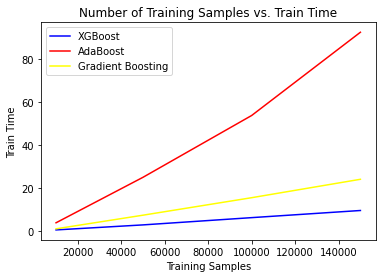

In [ ]:
# train size vs. train time 
plt.plot(ns, ctt_xgb, color='blue', label='XGBoost') 
plt.plot(ns, ctt_ada, color='red', label='AdaBoost') 
plt.plot(ns, ctt_gb, color='yellow', label='Gradient Boosting')
plt.legend() 
plt.title('Number of Training Samples vs. Train Time') 
plt.xlabel('Training Samples') 
plt.ylabel('Train Time') 
plt.show() 

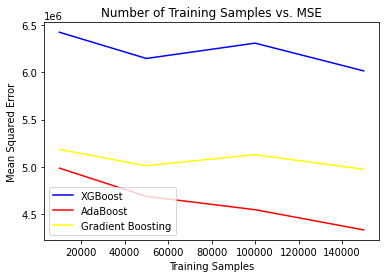

In [ ]:
# train size vs. mse 
plt.plot(ns, mse_xgb, color='blue', label='XGBoost') 
plt.plot(ns, mse_ada, color='red', label='AdaBoost') 
plt.plot(ns, mse_gb, color='yellow', label='Gradient Boosting')
plt.legend() 
plt.title('Number of Training Samples vs. MSE') 
plt.xlabel('Training Samples') 
plt.ylabel('Mean Squared Error') 
plt.show() 

In [ ]:
def xgboost_product1(n_train,par):
  '''Fit XGBoost on a subset of the product dataset with column subsampling. 
  Arguments: 
    1. n_train (int) -> size of the training subset.
  Returns: 
    1. train_time (float) -> time to fit gradient tree boosting. 
    2. accuracy (float) -> test accuracy on remaining data.'''
    
  # load data 
  dpath = '/content/gdrive/MyDrive' 

  data = np.loadtxt(dpath+'/otto-group-product-classification-challenge/train.csv', delimiter=',', skiprows=1, usecols=np.arange(94))

  label_str = pd.read_csv(dpath+'/otto-group-product-classification-challenge/train.csv', usecols=['target'])['target'].to_list()
  data=np.c_[data, label_str]
  n_test=data.shape[0]-n_train
  #Random sample 5000 values for testing
  random.seed(42)
  ind=random.sample(range(61878), n_test)

  x_test=data[ind,:]
  x_train=np.delete(data,ind,0)

  y_test=x_test[:,-1]
  y_train=x_train[:,-1]
  x_train=np.delete(x_train,0,1)
  x_test=np.delete(x_test,0,1)
  x_train=np.delete(x_train,-1,1)
  x_test=np.delete(x_test,-1,1)
  y_train=[w.replace('Class_', '') for w in y_train]
  y_train=[int(x) for x in y_train]
  y_test=[w.replace('Class_', '') for w in y_test]
  y_test=[int(x) for x in y_test]

  if par==0:
  # fit model no training data
    model = XGBClassifier(max_depth=6,n_estimators=10, verbose=2)
  
  if par==1:
  # fit model no training data
    model = XGBClassifier(max_depth=6,n_estimators=10, verbose=2, colsample_bytree=.5)
  
  if par==2:
  # fit model no training data
    model = XGBClassifier(max_depth=6,n_estimators=10, verbose=2, colsample_bylevel=.5)
  
  if par==3:
  # fit model no training data
    model = XGBClassifier(max_depth=6,n_estimators=10, verbose=2, colsample_bynode=.5)
  
  

  eval_set = [(x_train, y_train), (x_test, y_test)]

  start = time.time() 
  model.fit(x_train, y_train)#, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)
  train_time = time.time() - start 

  # make predictions for test data
  y_pred = model.predict(x_test)
  pred = [round(value) for value in y_pred]

  # evaluate predictions
  accuracy = accuracy_score(y_test, pred)
  error_rate=1-accuracy

  return train_time, accuracy

In [ ]:
# varying train sizes
ns = [10000, 20000, 40000, 60000] 
train_times = [] 
accuracies = [] 

# XGBoost metrics with no column subsampling 
for n in ns: 
  train_time, accuracy = xgboost_product1(n,0)
  train_times.append(train_time) 
  accuracies.append(accuracy) 

ctt_xgb0 = train_times 
acc_xgb0 = accuracies 


train_times = [] 
accuracies = [] 

# XGBoost metrics with column subsampling
for n in ns: 
  train_time, accuracy = xgboost_product1(n,1)
  train_times.append(train_time) 
  accuracies.append(accuracy) 

ctt_xgb1 = train_times 
acc_xgb1 = accuracies 


train_times = [] 
accuracies = [] 

# XGBoost metrics with column subsampling
for n in ns: 
  train_time, accuracy = xgboost_product1(n,2)
  train_times.append(train_time) 
  accuracies.append(accuracy) 

ctt_xgb2 = train_times 
acc_xgb2 = accuracies 


train_times = [] 
accuracies = [] 

# XGBoost metrics with column subsampling
for n in ns: 
  train_time, accuracy = xgboost_product1(n,3)
  train_times.append(train_time) 
  accuracies.append(accuracy) 

ctt_xgb3 = train_times 
acc_xgb3 = accuracies 

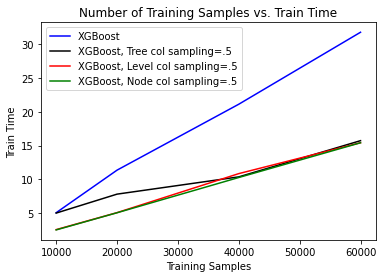

In [ ]:
# train size vs. train time 
plt.plot(ns, ctt_xgb0, color='blue', label='XGBoost') 
plt.plot(ns, ctt_xgb1, color='black', label='XGBoost, Tree col sampling=.5') 
plt.plot(ns, ctt_xgb2, color='red', label='XGBoost, Level col sampling=.5') 
plt.plot(ns, ctt_xgb3, color='green', label='XGBoost, Node col sampling=.5') 
plt.legend() 
plt.title('Number of Training Samples vs. Train Time') 
plt.xlabel('Training Samples') 
plt.ylabel('Train Time') 
plt.show() 

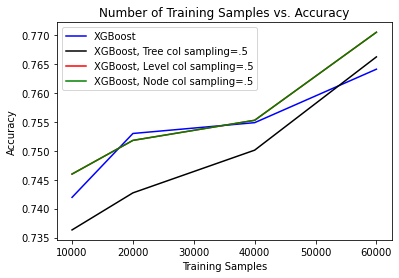

In [ ]:
# train size vs. accuracy
plt.plot(ns, acc_xgb0, color='blue', label='XGBoost') 
plt.plot(ns, acc_xgb1, color='black', label='XGBoost, Tree col sampling=.5') 
plt.plot(ns, acc_xgb2, color='red', label='XGBoost, Level col sampling=.5') 
plt.plot(ns, acc_xgb3, color='green', label='XGBoost, Node col sampling=.5') 
plt.legend() 
plt.title('Number of Training Samples vs. Accuracy') 
plt.xlabel('Training Samples') 
plt.ylabel('Accuracy') 
plt.show() 